In [91]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

In [107]:
class Deriviatives:
    def __init__(self,L,n):
        self.L = L
        self.n = n
        self.dx = self.L/self.n
        self.x = np.arange(-(self.L)/2,(self.L)/2,self.dx)
        self.f = np.cos(self.x)*np.exp(-1*np.power(self.x,2)/25)
        self.df = -(np.sin(self.x)*np.exp(-1*np.power(self.x,2)/25) + (2/25)*self.x*self.f)

    # deriviative using finite difference
    def finitediff_deriviative(self):
        self.fd = np.zeros_like(self.df)
        for i in range(len(self.df)-1):
            self.fd[i] = (self.f[i+1]-self.f[i])/self.dx   
        self.fd[-1] = self.fd[-2]
        return self.fd

    # spectral deriviative
    def spectral_deriviative(self):
        self.fhat = np.fft.fft(self.f)
        self.kappa = (2*np.pi/self.L)*np.arange(-(self.n)/2,(self.n)/2)
        self.kappa = np.fft.fftshift(self.kappa)
        self.dfhat = (1j)*self.kappa*self.fhat
        self.DF = np.real(np.fft.ifft(self.dfhat))
        return self.DF

d = Deriviatives(L=30,n=64)

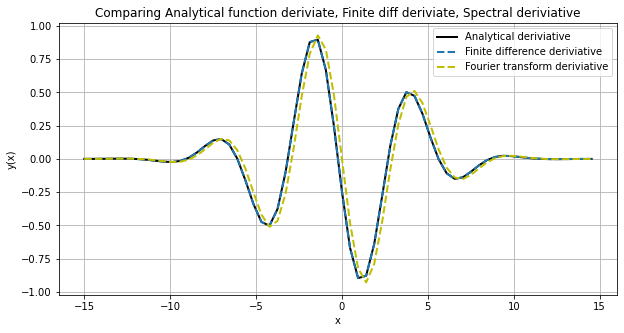

In [108]:
plt.plot(d.x,d.finitediff_deriviative(),label='Analytical deriviative',c='black',linewidth=2)
plt.plot(d.x,d.fd,'--',label='Finite difference deriviative',linewidth=2)
plt.plot(d.x,d.spectral_deriviative(),'--',label='Fourier transform deriviative',c='y',linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparing Analytical function deriviate, Finite diff deriviate, Spectral deriviative')
plt.show()